In [1]:
# load pandas
import pandas as pd
import numpy as np

url = 'https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip'
df = pd.read_csv(url)

# loading the columns of the dataset
city_mpg = df.city08
highway_mpg = df.highway08

url = 'https://github.com/mattharrison/datasets/raw/master/data/alta-noaa-1980-2019.csv'
alta_df = pd.read_csv(url)
dates = pd.to_datetime(alta_df.DATE)

C:\Users\sunse\AppData\Local\Temp\ipykernel_34412\2335691605.py:6: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


## 9. Plotting with a Series

In [2]:
%matplotlib inline

In [3]:
snow = (alta_df.SNOW.rename(dates))
snow

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

<Axes: ylabel='Frequency'>

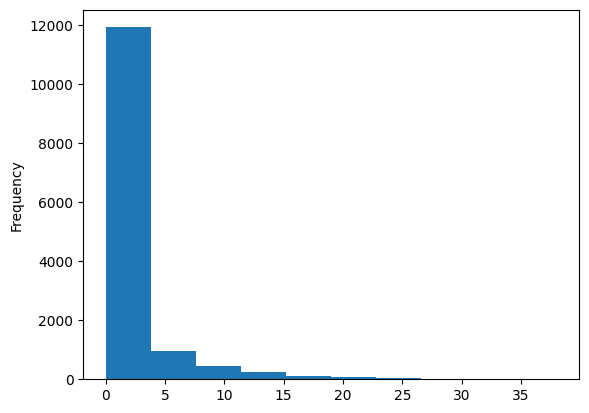

In [4]:
# plot histogram
snow.plot.hist()

<Axes: title={'center': 'Snowfall Histogram (in)'}, ylabel='Frequency'>

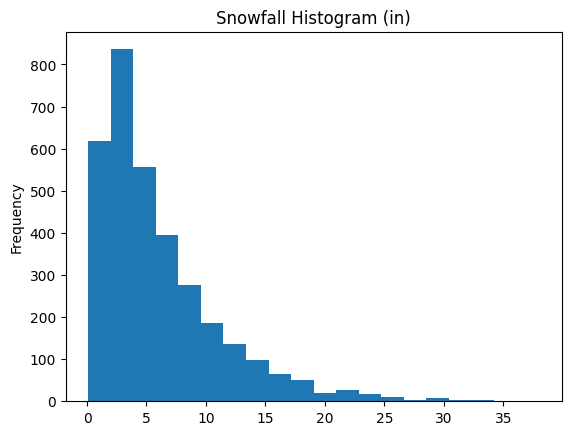

In [5]:
# drop zero entries, replot histogram
snow[snow>0].plot.hist(bins=20, title='Snowfall Histogram (in)')

<Axes: >

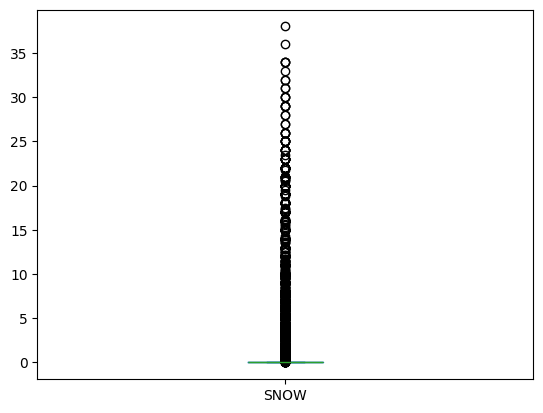

In [6]:
# boxplot
snow.plot.box()

<Axes: >

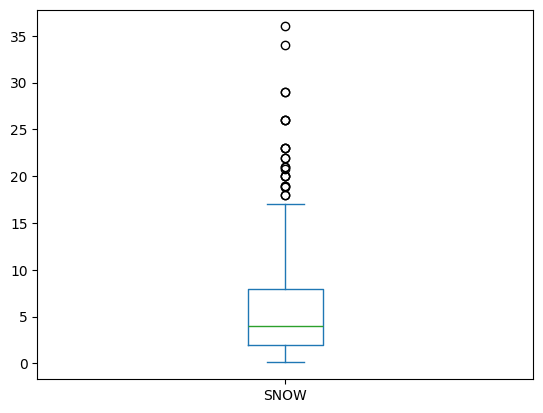

In [7]:
# replot box | limit to snow amounts during jan
snow[lambda s:(s.index.month==1) & (s>0)].plot.box()

<Axes: ylabel='Density'>

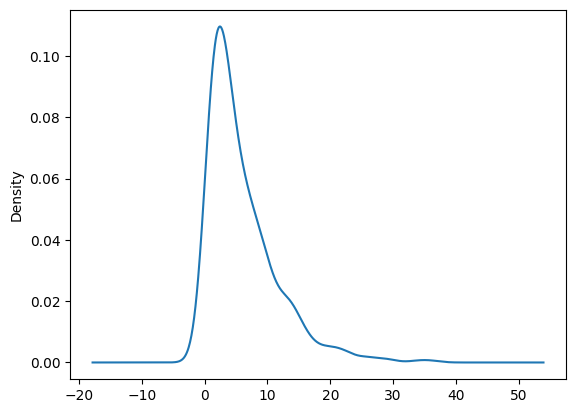

In [8]:
# kernel density plot
snow[lambda s:(s.index.month==1) & (s>0)].plot.kde() # smoothed histogram

<Axes: >

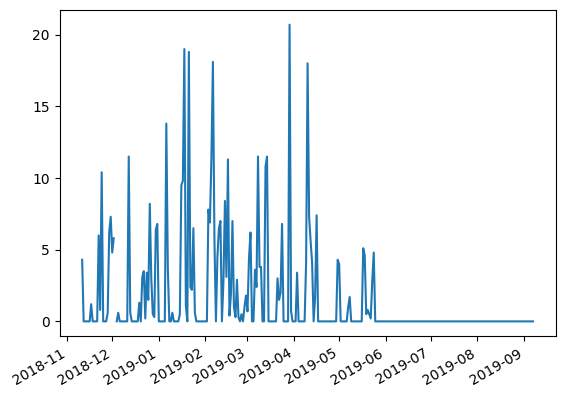

In [9]:
# line plot
(snow
    .iloc[-300:]
    .plot.line()
)

<Axes: >

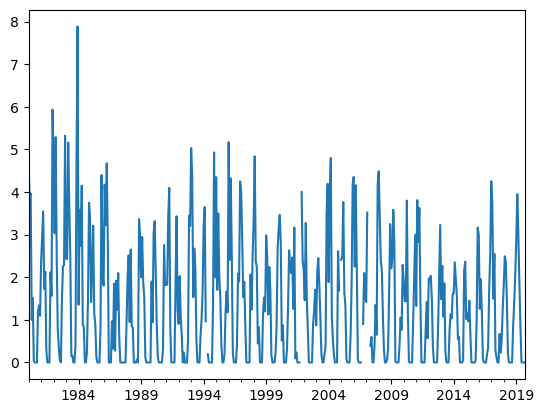

In [10]:
(snow
 .resample('M')
 .mean()
 .plot.line()
 )

In [11]:
snow.resample('M').mean()

1980-01-31    4.645161
1980-02-29    3.879310
1980-03-31    3.967742
1980-04-30    1.000000
1980-05-31    1.516129
                ...   
2019-05-31    0.838710
2019-06-30    0.000000
2019-07-31    0.000000
2019-08-31    0.000000
2019-09-30    0.000000
Freq: M, Name: SNOW, Length: 477, dtype: float64

<Axes: >

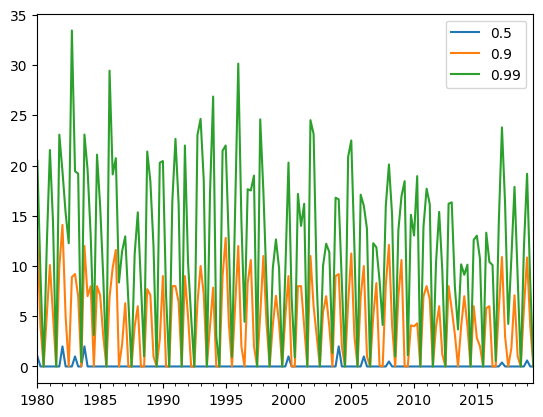

In [12]:
# line plot wiht multiple aggregations
(snow
 .resample('Q')
 .quantile([.5,.9,.99])
 .unstack()
 .iloc[-300:]
 .plot.line()
 )

In [13]:
# bar plots
season2017 = snow.loc['2016-10':'2017-05']
season2017

2016-10-01    0.0
2016-10-02    0.0
2016-10-03    4.9
2016-10-04    0.0
2016-10-05    0.6
             ... 
2017-05-27    0.0
2017-05-28    0.0
2017-05-29    0.0
2017-05-30    0.0
2017-05-31    0.0
Name: SNOW, Length: 243, dtype: float64

<Axes: title={'center': '2017 Monthly Percent of Snowfall'}>

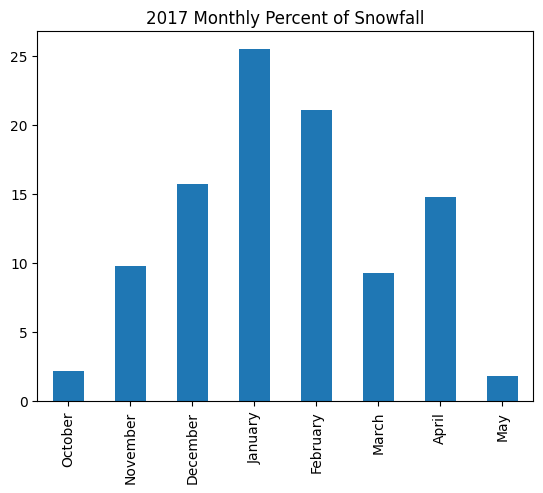

In [14]:
(season2017
 .resample('M')
 .sum()
 .div(season2017.sum())
 .mul(100)
 .rename(lambda idx: idx.month_name())
 .plot.bar(title='2017 Monthly Percent of Snowfall')
 )

<Axes: title={'center': '2017 Monthly Percent of Snowfall'}>

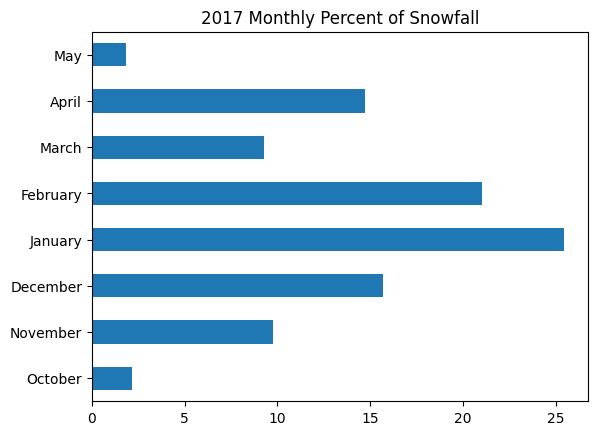

In [15]:
# horizontal
(season2017
 .resample('M')
 .sum()
 .div(season2017.sum())
 .mul(100)
 .rename(lambda idx: idx.month_name())
 .plot.barh(title='2017 Monthly Percent of Snowfall')
 )

In [16]:
# categorical data
url='https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip'
df=pd.read_csv(url)

C:\Users\sunse\AppData\Local\Temp\ipykernel_34412\4257120303.py:3: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(url)


In [18]:
df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [20]:
make = df.make

<Axes: xlabel='make'>

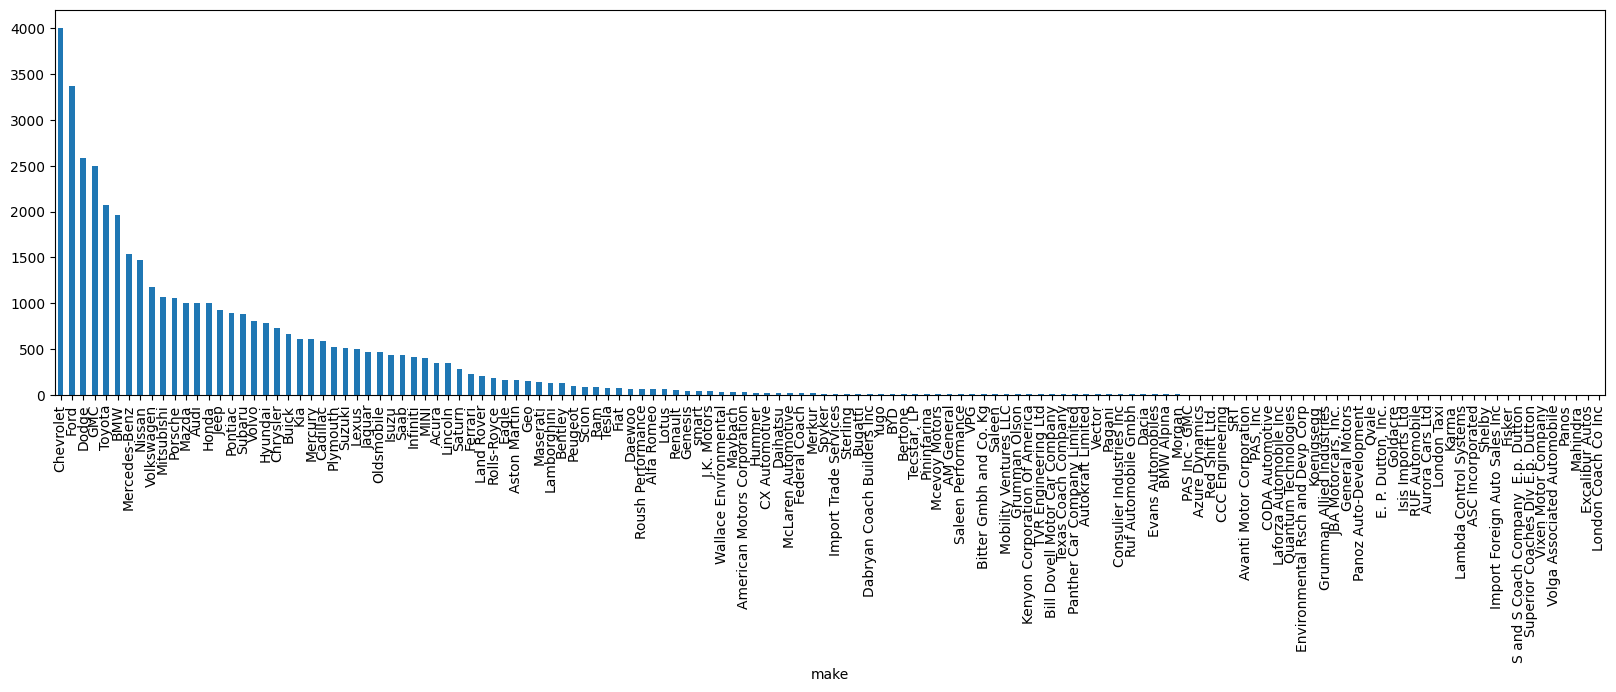

In [26]:
(make
 .value_counts()
 .plot.bar(figsize=(20,5)))

<Axes: ylabel='make'>

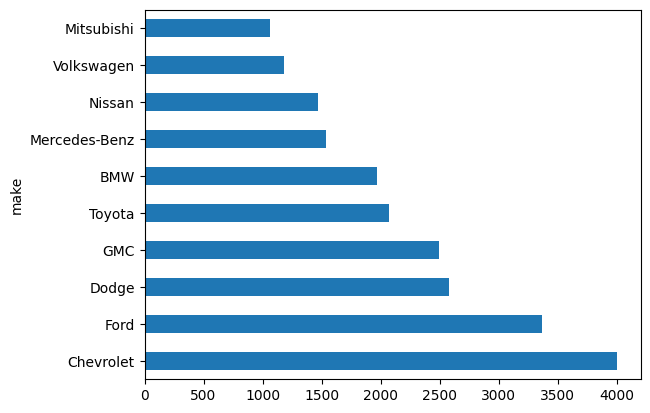

In [29]:
(make
 .value_counts()
 .iloc[:10]
 .plot.barh())

<Axes: title={'center': '2017 Monthly Percent of Snowfall'}, ylabel='SNOW'>

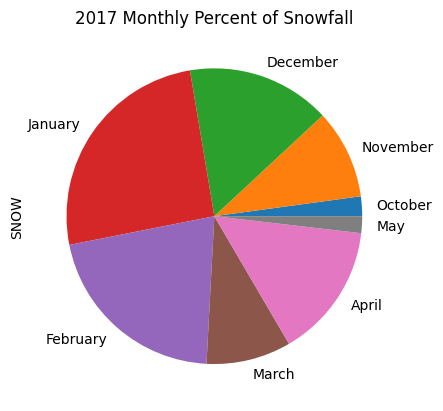

In [31]:
# pie
(season2017
 .resample('M')
 .sum()
 .div(season2017.sum())
 .mul(100)
 .rename(lambda idx: idx.month_name())
 .plot.pie(title='2017 Monthly Percent of Snowfall'))

Exercise

<Axes: ylabel='Frequency'>

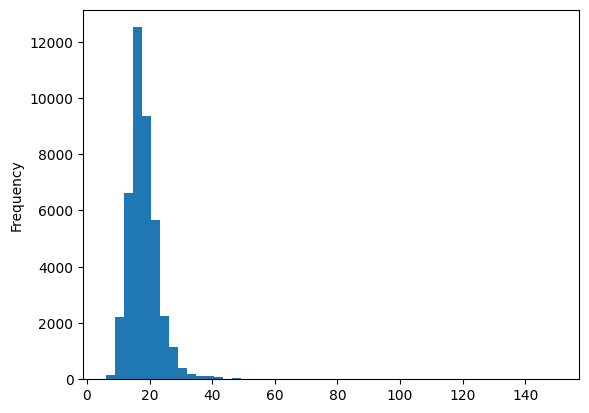

In [36]:
#q1
city_mpg.plot.hist(bins=50)

<Axes: >

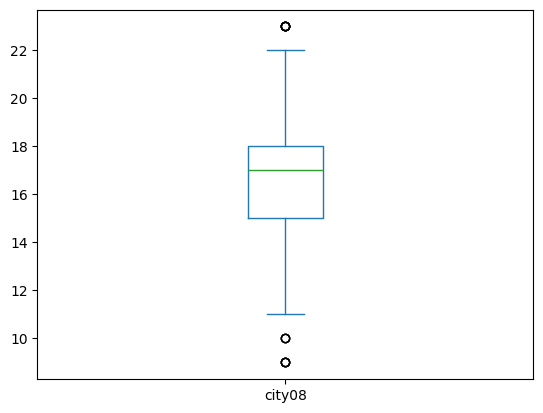

In [38]:
#q2
city_mpg[:100].plot.box()

<Axes: ylabel='Density'>

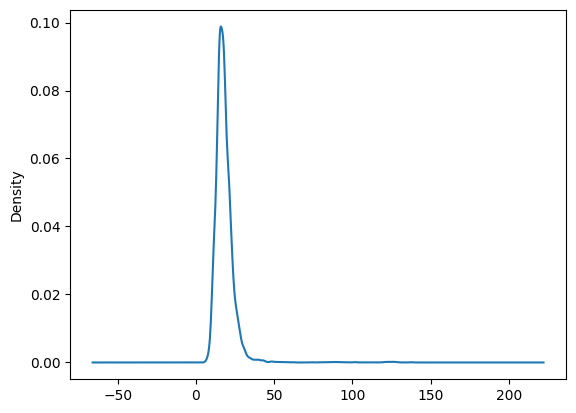

In [39]:
#q3
city_mpg.plot.kde()

<Axes: >

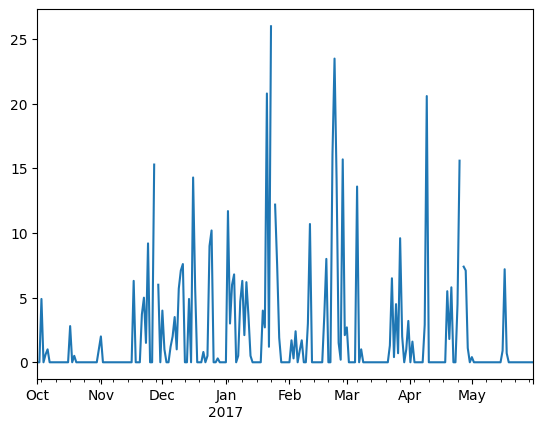

In [41]:
#q4
season2017.plot.line()

<Axes: ylabel='make'>

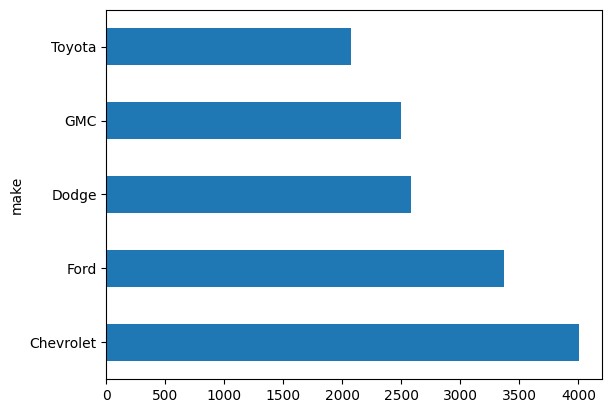

In [45]:
#q5
(make
 .value_counts()
 .iloc[:5]
 .plot.barh())

<Axes: ylabel='count'>

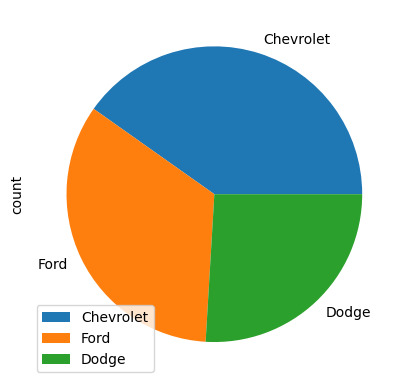

In [48]:
#q6
(make
 .value_counts()
 .iloc[:3]
 .plot.pie(legend=True))